In [1]:
#1
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


data = arff.loadarff('phpgNaXZe.arff')
df = pd.DataFrame(data[0])

df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160.0,12.00,5.73,23.11,b'1',49.0,25.30,97.20,52.0,b'2'
1,144.0,0.01,4.41,28.61,b'2',55.0,28.87,2.06,63.0,b'2'
2,118.0,0.08,3.48,32.28,b'1',52.0,29.14,3.81,46.0,b'1'
3,170.0,7.50,6.41,38.03,b'1',51.0,31.99,24.26,58.0,b'2'
4,134.0,13.60,3.50,27.78,b'1',60.0,25.99,57.34,49.0,b'2'
...,...,...,...,...,...,...,...,...,...,...
457,214.0,0.40,5.98,31.72,b'2',64.0,28.45,0.00,58.0,b'1'
458,182.0,4.20,4.41,32.10,b'2',52.0,28.61,18.72,52.0,b'2'
459,108.0,3.00,1.59,15.23,b'2',40.0,20.09,26.64,55.0,b'1'
460,118.0,5.40,11.61,30.79,b'2',64.0,27.35,23.97,40.0,b'1'


In [2]:
#2
df.columns=['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'type', 'obesity', 'alcohol', 'age', 'chd']

In [3]:
#3
list(df)

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'type',
 'obesity',
 'alcohol',
 'age',
 'chd']

In [4]:
#4
encoder = LabelEncoder()
df['famhist']=encoder.fit_transform(df['famhist']) # changes to integer
df['chd']=encoder.fit_transform(df['chd']) # changes to integer

In [5]:
#5
df

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160.0,12.00,5.73,23.11,0,49.0,25.30,97.20,52.0,1
1,144.0,0.01,4.41,28.61,1,55.0,28.87,2.06,63.0,1
2,118.0,0.08,3.48,32.28,0,52.0,29.14,3.81,46.0,0
3,170.0,7.50,6.41,38.03,0,51.0,31.99,24.26,58.0,1
4,134.0,13.60,3.50,27.78,0,60.0,25.99,57.34,49.0,1
...,...,...,...,...,...,...,...,...,...,...
457,214.0,0.40,5.98,31.72,1,64.0,28.45,0.00,58.0,0
458,182.0,4.20,4.41,32.10,1,52.0,28.61,18.72,52.0,1
459,108.0,3.00,1.59,15.23,1,40.0,20.09,26.64,55.0,0
460,118.0,5.40,11.61,30.79,1,64.0,27.35,23.97,40.0,0


In [6]:
#6
y = pd.DataFrame(df['chd'].copy())
y

,chd
0,1
1,1
2,0
3,1
4,1
...,...
457,0
458,1
459,0
460,0


In [7]:
#7
x = df.drop(columns=['chd'])
x

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age
0,160.0,12.00,5.73,23.11,0,49.0,25.30,97.20,52.0
1,144.0,0.01,4.41,28.61,1,55.0,28.87,2.06,63.0
2,118.0,0.08,3.48,32.28,0,52.0,29.14,3.81,46.0
3,170.0,7.50,6.41,38.03,0,51.0,31.99,24.26,58.0
4,134.0,13.60,3.50,27.78,0,60.0,25.99,57.34,49.0
...,...,...,...,...,...,...,...,...,...
457,214.0,0.40,5.98,31.72,1,64.0,28.45,0.00,58.0
458,182.0,4.20,4.41,32.10,1,52.0,28.61,18.72,52.0
459,108.0,3.00,1.59,15.23,1,40.0,20.09,26.64,55.0
460,118.0,5.40,11.61,30.79,1,64.0,27.35,23.97,40.0


In [8]:
#8
x_arr = np.array(x)
y_arr = np.array(y)

In [9]:
#9
y_arr.shape

(462, 1)

In [10]:
#10
y_arr = np.reshape(y_arr, (-1))
y_arr.shape

(462,)

In [11]:
#11
X_train, X_test, y_train, y_test = train_test_split(x_arr, y_arr, random_state=42, test_size=0.2)

In [12]:
#ANN - Articial Neural Network

In [13]:
#12
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

ann_clf = MLPClassifier()

parameters = {'solver': ['lbfgs'], 
              'alpha':[1e-4], 
              'hidden_layer_sizes':(9,14,14,2), 
              'random_state': [42],
              'max_iter':[10000],
              'early_stopping':[False]
             }

#hidden_layer_sizes = 9 input, 14-14 neuron in 2 layers, 1 output layer

In [14]:
#13
# type of scoring to compare parameter combos
acc_scorer = make_scorer(accuracy_score)

# run grid search
grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# pick the best combination of parameters
ann_clf = grid_obj.best_estimator_

In [15]:
#14
ann_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=9, max_iter=10000, random_state=42,
              solver='lbfgs')

In [16]:
#15
y_pred_ann = ann_clf.predict(X_test)

In [17]:
#16
cm_ann = confusion_matrix(y_test,y_pred_ann)
cm_ann

array([[53,  6],
       [15, 19]], dtype=int64)

In [18]:
#17
ann_result = accuracy_score(y_test,y_pred_ann)
ann_result

0.7741935483870968

In [19]:
#KNN - k-Nearest Neighbour

In [20]:
#18
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1, leaf_size = 60, algorithm = 'brute')

In [21]:
#19A
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=60, n_jobs=-1)

In [22]:
#20
y_pred_knn = knn_clf.predict(X_test)
y_pred_knn

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0])

In [23]:
#21
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_knn

array([[51,  8],
       [24, 10]], dtype=int64)

In [24]:
#22
knn_result = accuracy_score(y_test,y_pred_knn)
knn_result

0.6559139784946236

In [25]:
#SVM - Support Vector Machine

In [26]:
#23
from sklearn import svm

svm_clf = svm.SVC(kernel = 'linear')

In [27]:
#24
svm_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [28]:
#25
y_pred_svm = svm_clf.predict(X_test)

In [29]:
#26
y_pred_svm

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0])

In [30]:
#27
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_svm

array([[54,  5],
       [17, 17]], dtype=int64)

In [31]:
#28
svm_result = accuracy_score(y_test,y_pred_svm)
svm_result

0.7634408602150538

In [32]:
#29
# Compare accuracy scores
print("ANN Accuracy: ", ann_result)
print("KNN Accuracy: ", knn_result)
print("SVM Accuracy: ", svm_result)

ANN Accuracy:  0.7741935483870968
KNN Accuracy:  0.6559139784946236
SVM Accuracy:  0.7634408602150538


In [33]:
#30
#Comparing precision scores
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
precision_knn = cm_knn[0][0]/(cm_knn[0][0]+cm_knn[1][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
print("ANN Precision: ", precision_ann)
print("KNN Precision: ", precision_knn)
print("SVM Precision: ", precision_svm)

ANN Precision:  0.7361111111111112
KNN Precision:  0.8360655737704918
SVM Precision:  0.7605633802816901


In [34]:
#31
#Comparing recall scores
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
recall_knn = cm_knn[0][0]/(cm_knn[0][0] + cm_knn[0][1])
recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
print("ANN Recall: ", recall_ann)
print("KNN Recall: ", recall_knn)
print("SVM Recall: ", recall_svm)

ANN Recall:  0.8983050847457628
KNN Recall:  0.864406779661017
SVM Recall:  0.9152542372881356


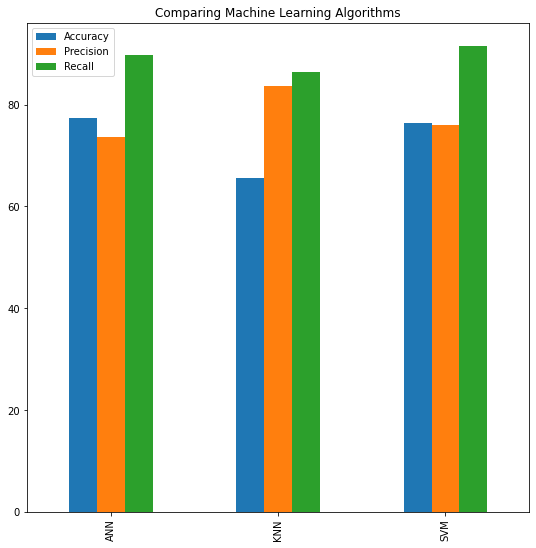

In [49]:
#32
results = {'Accuracy': [ann_result*100,knn_result*100,svm_result*100],
           'Precision': [precision_ann*100,precision_knn*100,precision_svm*100],
           'Recall': [recall_ann*100,recall_knn*100,recall_svm*100],}
index = ['ANN','KNN','SVM']
results =pd.DataFrame(results,index=index)
plot = results.plot(kind='bar',title='Comparing Machine Learning Algorithms',figsize =(9,9)).get_figure()

In [41]:
#33
f1_ann = 2 * (precision_ann * recall_ann) / (precision_ann + recall_ann)
f1_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)
f1_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)
print("ANN F-Score: ", f1_ann)
print("KNN F-Score: ", f1_knn)
print("SVM F-Score: ", f1_svm)

ANN F-Score:  0.8091603053435116
KNN F-Score:  0.85
SVM F-Score:  0.8307692307692307
